In [9]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


👉 Upload 1 content image first, then multiple style images


Saving content.jpg to content (20).jpg
Saving style1.jpg to style1 (16).jpg
Saving style2.jpg to style2 (16).jpg
Saving style3.jpg to style3 (12).jpg
Saving style4.jpg to style4 (12).jpg
Saving style5.jpg to style5 (12).jpg
🔄 Loading model...
✅ Model loaded!


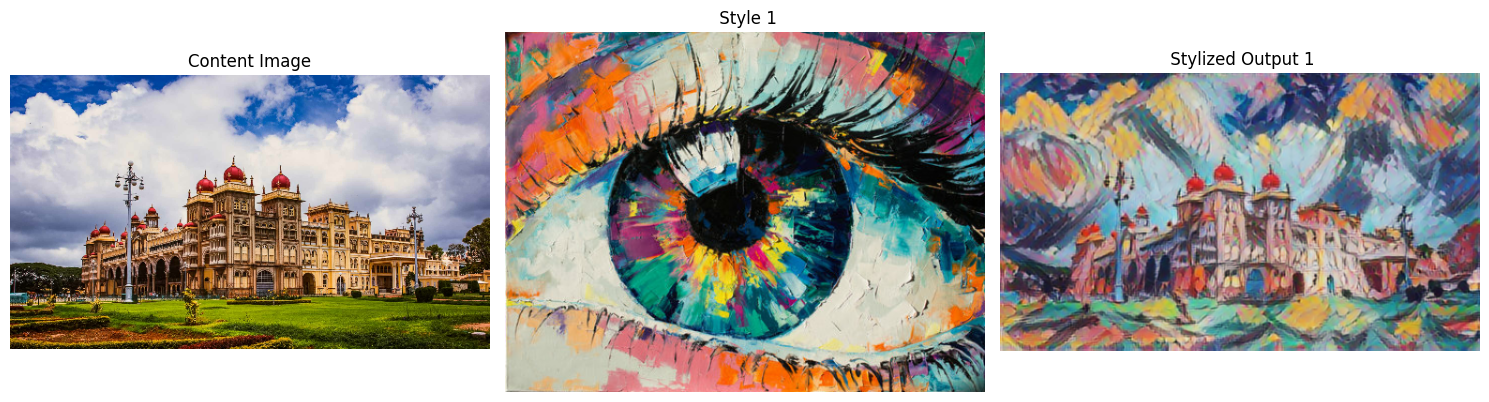

 Saved: stylized_outputs/stylized_output_1.jpg


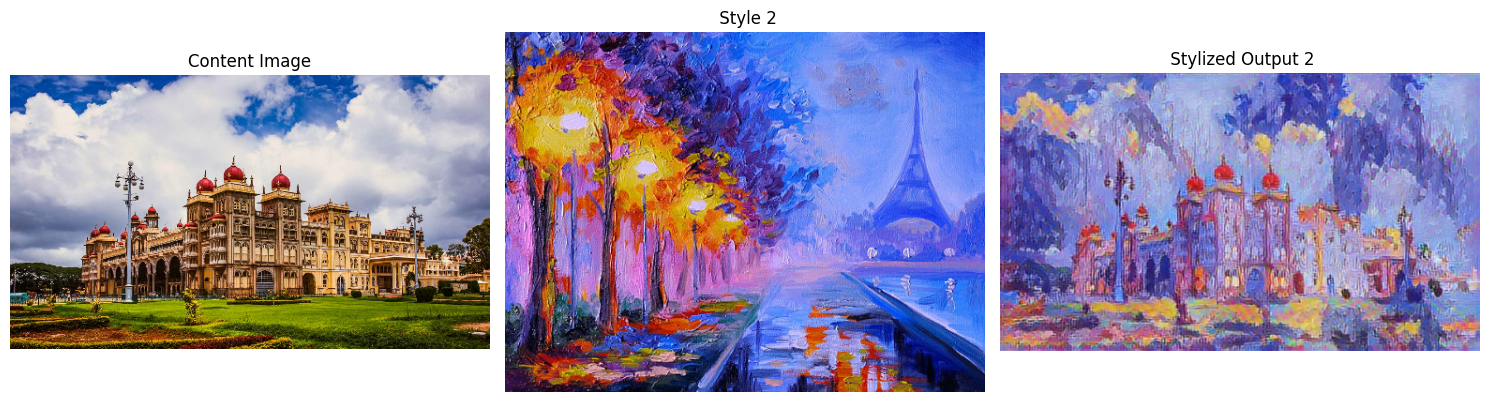

 Saved: stylized_outputs/stylized_output_2.jpg


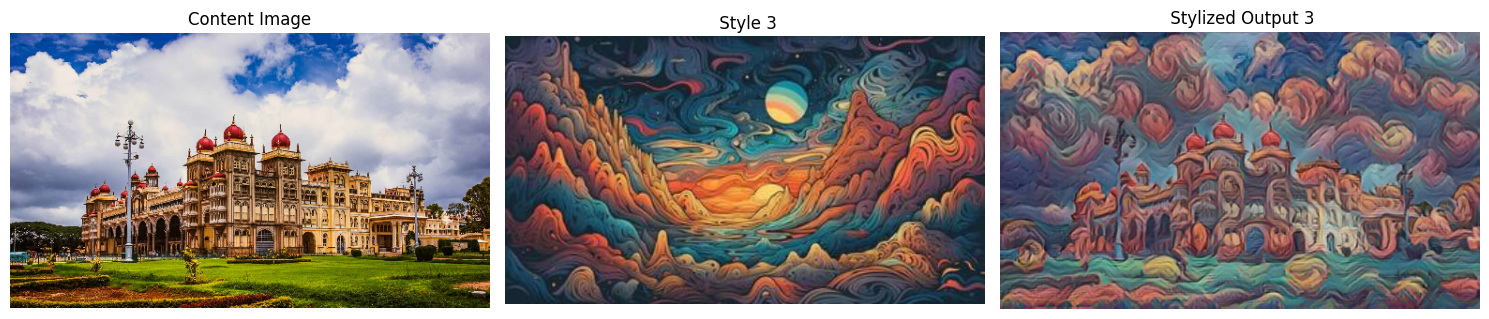

 Saved: stylized_outputs/stylized_output_3.jpg


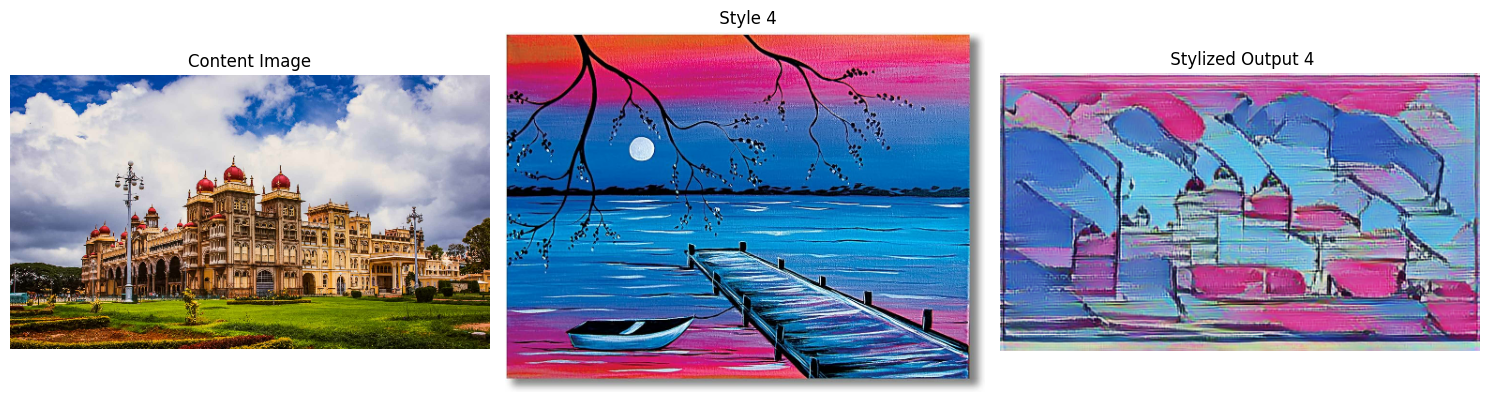

 Saved: stylized_outputs/stylized_output_4.jpg


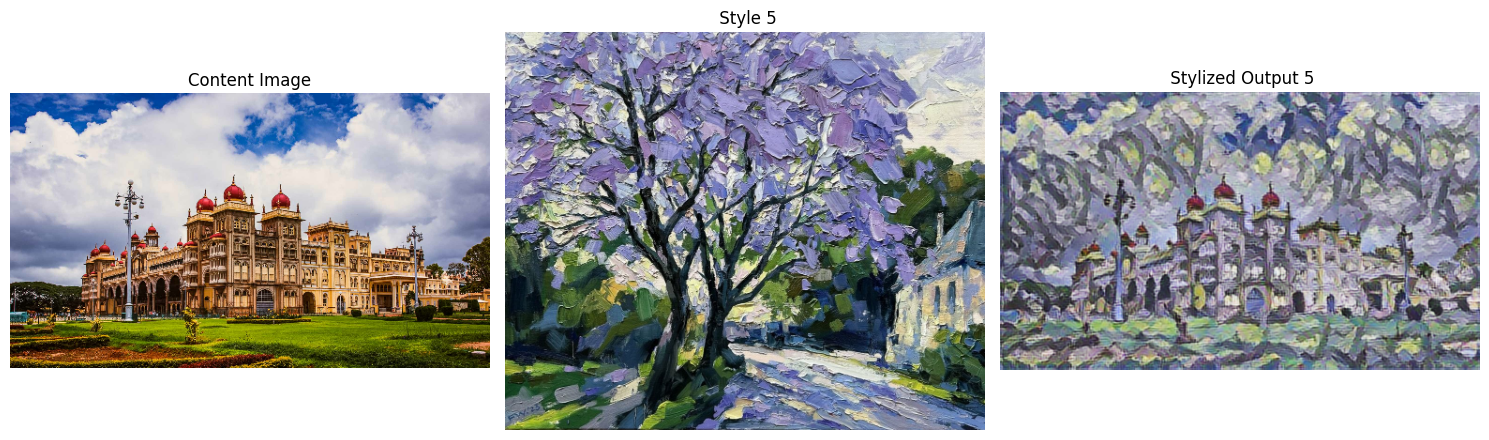

 Saved: stylized_outputs/stylized_output_5.jpg


In [31]:
# STEP 1: Install necessary packages
!pip install tensorflow tensorflow_hub matplotlib

# STEP 2: Import libraries
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
import os

# STEP 3: Upload images (1 content image first, then one or more style images)
print("👉 Upload 1 content image first, then multiple style images")
uploaded = files.upload()

# Extract file names
file_names = list(uploaded.keys())
content_path = file_names[0]
style_paths = file_names[1:]

# Supported formats
supported_formats = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')
valid_style_paths = [path for path in style_paths if path.lower().endswith(supported_formats)]

# STEP 4: Load and preprocess images safely
def safe_load_image(path, max_dim=512):
    try:
        img = tf.io.read_file(path)
        img = tf.image.decode_image(img, channels=3, expand_animations=False)
        img = tf.image.convert_image_dtype(img, tf.float32)
        shape = tf.cast(tf.shape(img)[:-1], tf.float32)
        long_dim = max(shape)
        scale = max_dim / long_dim
        new_shape = tf.cast(shape * scale, tf.int32)
        img = tf.image.resize(img, new_shape)
        return img[tf.newaxis, :]
    except Exception as e:
        print(f"❌ Skipping '{path}': {e}")
        return None

# Load content image
content_image = safe_load_image(content_path)

# Load style images safely
style_images = []
valid_style_names = []

for path in valid_style_paths:
    img = safe_load_image(path)
    if img is not None:
        style_images.append(img)
        valid_style_names.append(path)

# STEP 5: Load TensorFlow Hub model
print("🔄 Loading model...")
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
print("✅ Model loaded!")

# STEP 6: Stylize and save/display each result
output_dir = "stylized_outputs"
os.makedirs(output_dir, exist_ok=True)

for idx, (style_image, style_name) in enumerate(zip(style_images, valid_style_names)):
    stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

    # Display images
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(tf.squeeze(content_image))
    plt.title("Content Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(tf.squeeze(style_image))
    plt.title(f" Style {idx + 1}")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(tf.squeeze(stylized_image))
    plt.title(f" Stylized Output {idx + 1}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Save stylized output
    output_path = os.path.join(output_dir, f"stylized_output_{idx + 1}.jpg")
    tf.keras.utils.save_img(output_path, tf.squeeze(stylized_image))
    print(f" Saved: {output_path}")
